<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/T%C3%A9sisjeje2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importar librerías necesarias***

In [1]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from statistics import mean

In [2]:
!pip install ete3
import ete3
from ete3 import Tree
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform
import random
from IPython.display import display, Latex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=ca92d71a20b43a32ca17163c30deed8e5418b24dea5e2cbb98c5c2e277ebb65d
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


### ***Cargar y limpiar base de datos***

In [3]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df['age'] = df['age'].replace("Dec-18", "12-18", regex=True)
df.head(8)

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,12-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
5,19-25,Male,Student in College,NaN,5,7,0.5,4,4,-1.0,...,-0.5,0.0,0.0,110,1100,Complete Physical Attendance,No,NaN,5,NaN
6,19-25,Male,Student in College,NaN,5,4,0.5,1,3,0.5,...,0.5,1.0,1.0,1100,1101,Work/study from home,Yes,NaN,5,NaN
7,19-25,Male,Student in College,NaN,7,9,0.5,3,2,0.0,...,-1.0,-0.5,0.0,1000,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
df1 = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df1

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


Eliminaremos todos las variables no numericas y las que no nos aportan información

In [5]:
# @title
df2 = df.drop(['gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
imge = df2.head(10)
imge

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,19-25,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,12-18,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,19-25,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,19-25,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,19-25,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
5,19-25,5,7,0.5,4,4,-1.0,-1.0,0.0,-0.5,0.0,0.0
6,19-25,5,4,0.5,1,3,0.5,0.5,1.0,0.5,1.0,1.0
7,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
8,19-25,5,9,0.5,1,2,1.0,1.0,1.0,1.0,1.0,1.0
9,19-25,7,7,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,0.0


### ***Clusterización***

In [86]:
seed = 42
np.random.seed(seed)
dfprueba = df2.sample(n=800)

Escalar los datos

In [87]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba.drop(["age"],axis=1))

In [88]:
dfprueba.reset_index(drop=True,inplace=True)
ndf = pd.DataFrame(df_scaled, columns = [nombres])
ndf.loc[:,'age'] = dfprueba['age']
column_order = ['age','time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
ndf = ndf[column_order]

*Dendrograma*

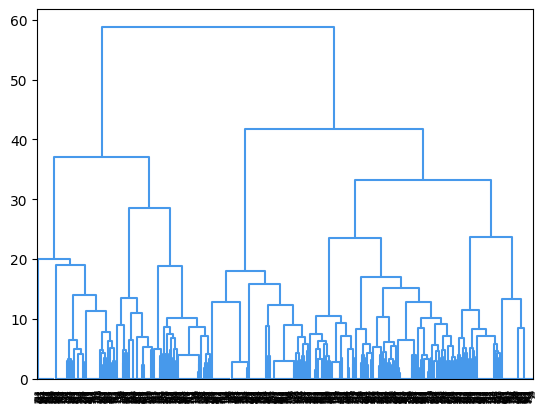

In [89]:
dendo=linkage(df_scaled, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma = sch.dendrogram(dendo, color_threshold=float('inf'), link_color_func=color_func)

### ***Cálculo de Sn***

Convertir el dendrograma en formato newick

In [91]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

Convertir el dendrograma en cadena de texto

In [93]:
leaf_names = range(0, 800)
tree1 = hierarchy.to_tree(dendo, False)
newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)
tree = ete3.Tree(newick_tree1)

print(newick_tree1)

(((((((((((((((((((((29:0.00,13:0.00):0.00,31:0.00):0.00,33:0.00):0.00,159:0.00):0.00,273:0.00):0.00,347:0.00):0.00,362:0.00):0.00,373:0.00):0.00,378:0.00):0.00,393:0.00):0.00,602:0.00):0.00,626:0.00):0.00,632:0.00):0.00,734:0.00):0.00,795:0.00):8.54,(((((((((170:0.00,165:0.00):0.00,206:0.00):0.00,264:0.00):0.00,402:0.00):0.00,539:0.00):0.00,650:0.00):0.00,664:0.00):0.00,677:0.00):0.00,782:0.00):8.54):4.75,(((((((((((((((((((((((((38:0.00,12:0.00):0.00,59:0.00):0.00,65:0.00):0.00,95:0.00):0.00,178:0.00):0.00,186:0.00):0.00,295:0.00):0.00,320:0.00):0.00,359:0.00):0.00,392:0.00):0.00,422:0.00):0.00,517:0.00):0.00,545:0.00):0.00,547:0.00):0.00,573:0.00):0.00,600:0.00):0.00,611:0.00):0.00,641:0.00):0.00,659:0.00):0.00,667:0.00):0.00,687:0.00):0.00,714:0.00):0.00,735:0.00):0.00,756:0.00):0.00,765:0.00):13.29):10.46,((((((((116:2.51,10:2.51):0.91,((657:1.56,17:1.56):0.49,336:2.05):1.38):0.82,((493:1.97,356:1.97):0.86,(260:1.54,83:1.54):1.29):1.42):0.40,(443:1.94,290:1.94):2.70):1.09,(213:0.0

Hallar todos los subárboles del dendrograma

In [94]:
from ete3 import Tree

def asignar_nombres(arbol):
    # Asignar nombres a los nodos si no tienen uno
    for i, nodo in enumerate(arbol.traverse()):
        if not nodo.name:
            nodo.name = f"Nodo_{i}"

def obtener_subarboles(arbol):
    subarboles = []

    for nodo in arbol.traverse():
        # Buscar nodos descendientes del nodo actual
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        # Construir un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol = Tree()
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles

# Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)


asignar_nombres(tree)
todos_subarboles = obtener_subarboles(tree)

# Imprimir la representación en formato de texto de cada subárbol
#for i, subarbol in enumerate(todos_subarboles):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")

Determinar los n-subárboles

In [96]:
n_subarboles = []

for n in range(1, 801):
    n_subarbol = []  # Inicializar la lista para cada valor de n
    for subarbol in todos_subarboles:
        if len(subarbol) <= n:
            n_subarbol.append(subarbol)
    n_subarboles.append((n, n_subarbol))  # Agregar la lista de n-subarboles a la lista general

# Imprimir o procesar la lista de n-subarboles
#for n, subarboles in n_subarboles:
 #   print(f"Subárboles con tamaño menor o igual a {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

Determinar los n-subárboles maximales

In [97]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    nodos1 = set(nodo.name for nodo in subarbol1.traverse())
    nodos2 = set(nodo.name for nodo in subarbol2.traverse())

    return nodos1.issubset(nodos2)

def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []

    for n, subarboles in n_subarboles:
        subarboles_maximales = []
        print(n)
        if n==1:
          for subarbol in subarboles:
              subarboles_maximales.append(subarbol)
          maximales.append((n, subarboles_maximales))

        if n != 1:

          for subarbol in subarboles:
              es_maximal = True

              # Comprobar si el subárbol está contenido en otro subárbol
              for otro_subarbol in subarboles:
                  if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                    es_maximal = False
                    break

              if es_maximal:
                subarboles_maximales.append(subarbol)

          maximales.append((n, subarboles_maximales))


    return maximales

maximales = obtener_maximales(n_subarboles)

# Imprimir o procesar la lista de n-subarboles maximales
for n, subarboles in maximales:
    print(f"Subárboles maximales con tamaño {n}:")
    for subarbol in subarboles:
        print(obtener_texto(subarbol))
    print("\n")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
((((489,92),(((((((((((((((((((((((((122,74),132),191),224),251),297),304),325),337),349),383),387),419),431),444),471),485),491),534),552),708),733),759),762),771)),(((((((((((((((((((((((((((((((60,37),85),87),105),109),123),162),163),174),190),197),223),229),240),261),284),344),354),413),435),441),463),477),505),585),630),643),689),732),748),62)));
(((((((715,332),(686,432)),(((((((((((((21,0),108),166),177),267),487),588),642),652),655),675),720),459)),(((((((((153,32),300),421),423),480),528),551),558),676)),((((((200,28),255),542),680),773),((((((125,111),158),219),314),319),609))),(((((529,408),97),((738,509),407)),((784,54),343)),(((((((((70,67),93),96),139),154),172),350),397),753))));
((((((((((((((((((((((((((((148,89),202),208),238),245),249),250),277),292),360),374),411),448),458),513),536),544),557),589),621),671),681),717),722),743),754),758));
((((((((((((((((((29,13),31),33),159),273),347),362),373),378

Calcular Sn

In [98]:
Sn = []

for n, subarboles in maximales:
    Sj = len(subarboles)  # Inicializar con la cantidad de n-subárboles maximales
    for subarbol in subarboles:
        Sj *= len(subarbol)
    Sn.append((n, Sj))

# Imprimir la lista Sn
for n, s in Sn:
    subindice = ''.join(chr(0x2080 + int(digito)) for digito in str(n))
    print(f"S{subindice}:", s)

S₁: 800
S₂: 14629288850236088780847431186857325147923152896
S₃: 39691591062456307663646565593822526448478980027727671436771328
S₄: 47197439932353453634781320551640723300970115004719271710823840481280
S₅: 4709589090606120960000000000000000000000000000000000000000000000000000
S₆: 14302751609042685343211994680180119803886363496939520000000000000000000
S₇: 151813754438761585875700608349300536193354830972557721600000000000000000
S₈: 313983645223944521419318411489717877895607005424681998090240000000000000
S₉: 81261917253661402943541011592354934875047624944402542687682560000000000
S₁₀: 47632154298242976028270337912519786496000000000000000000000000000000000
S₁₁: 2574363192278848324803592440383929037758013944087393075200000000000000
S₁₂: 65178091021975030575136111603602067035832931262765465600000000000000
S₁₃: 128441791285579837024291542199393686743280840101540659200000000000
S₁₄: 41705547700092609012984798172104208073938862703693004800000000000
S₁₅: 26877630531438024790430255150601487242362880

Encontrar el máximo y el n asociado

In [99]:
maximo_valor = max(Sn, key=lambda x: x[1])
print(f"Valor máximo en Sn: {maximo_valor}")

k = maximo_valor[0]
print(f"El valor de n es {k}")

Valor máximo en Sn: (8, 313983645223944521419318411489717877895607005424681998090240000000000000)
El valor de n es 8


### ***Base topológica***

In [ ]:
n_subarboles_maximales = None

for n, subarboles in maximales:
    if n == k:
        n_subarboles_maximales = subarboles
        break

Agrupar las hojas de los 4-subarboles maximales en subconjuntos

In [ ]:
Base =[]

for subarbol in n_subarboles_maximales:
  y = []
  for node in subarbol.traverse():
    if node.is_leaf():
      elem = node.name
      y.append(elem)
  Base.append(y)
subindice_k = ''.join(chr(0x2080 + int(digito)) for digito in str(k))
print(f"El valor de n es {k}, y así, obtenemos la base topológica B{subindice_k}")
Base

In [ ]:
A = ['4','9','18','42','43','46','79','84','98']
#A = ['12','38','59','65','95']

### ***Puntos de la base***

Para el subconjunto A

***Exterior***

In [ ]:
Ext = []

for i in Base:
    if not any(elem in A for elem in i):
        #B.append(i)
        Ext.extend(i)
print(Ext)

***Interior***

In [ ]:
Int = []

for i in Base:
    if all(elem in A for elem in i):
        #B.append(i)
        Int.extend(i)
print(Int)


***Adherencia***

In [ ]:
Adh = []

for i in Base:
  if any(elem in A for elem in i):
    Adh.extend(i)
print(Adh)

In [ ]:
lista_m = [str(i) for i in range(101)]
resultados = []

for m in lista_m:
    for sublista in Base:
        if m in sublista and any(elem in A for elem in sublista):
            resultados.append(m)
            break
print(resultados)

***Límite***

In [ ]:
Lim = []

for i in Base:
  for m in i:
    if any(elem in A for elem in i if elem != m):
      Lim.append(m)
print(Lim)

In [ ]:
resultados1 = []

for m in lista_m:
    for sublista in Base:
        if m in sublista and any(elem in A for elem in sublista if elem != m):
            resultados1.append(m)
            break

print(resultados1)

***Frontera***

In [ ]:
Fr = []

for i in Base:
    if any(elem in A for elem in i) and any(elem not in A for elem in i):
        Fr.extend(i)

print(Fr)

### ***Análisis topológico***

In [ ]:
#Para poder convertir age en cadena de texto
ndf['age'] = ndf['age'].astype(str, errors='raise')

Tomar los diferentes rangos de edades como subconjuntos a estudiar

In [ ]:
categorias_unicas = df['age'].unique()
print(categorias_unicas)

In [ ]:
edades1 = dfprueba[dfprueba['age']=='12-18']
#n = len(edades1)
edades1

Conjunto Adherenca de A

In [ ]:
indices_a_seleccionar = [66,39,42,4,73,8,43,20,80,98,18,15,82,46,99,84,9]
AdherenciaA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
AdherenciaA

Frontera de A

In [ ]:
indices_a_seleccionar = [73,79,8,43,75,20,66,39,42,4,80,98,18,15,82,46,99,84]
FronteraA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
FronteraA

In [ ]:
indices_a_seleccionar = [73,8,66,34,42,4,75,20,80,98,18,15,82,99]
LimiteA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
LimiteA

In [ ]:
indices_a_seleccionar = [1,2,3,26,49,52,58,63,81,33,31,29,13,77,53,51,56,54,32,21,0,96,93,70,67,97,45,14,11,61,47,36,28,65,59,38,12,95,50,34,30,55,57,94,35,48,24,90,62,44,92,74,87,85,60,37,52,89,41,27,16,6,5,83,17,64,10,69,91,72,76,25,23,19,88,86,71,40,22,78,68,7]
ExteriorA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
ExteriorA


In [ ]:
resumen_estadistico1 = edades1.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico1)

In [ ]:
resumen_limite = LimiteA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_limite)

In [ ]:
resumen_frontera = FronteraA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_frontera)

In [ ]:
resumen_adherencia = AdherenciaA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_adherencia)

In [ ]:
resumen_exterior = ExteriorA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_exterior)

In [ ]:
edades2 = dfprueba[dfprueba['age']=='19-25']
#n = len(edades1)
edades2

In [ ]:
resumen_estadistico2 = edades2.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico2)

In [ ]:
edades3 = dfprueba[dfprueba['age']=='26-32']
#n = len(edades1)
edades3

In [ ]:
resumen_estadistico3 = edades3.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico3)

In [ ]:
edades4 = dfprueba[dfprueba['age']=='33-40']
#n = len(edades1)
edades4

In [ ]:
resumen_estadistico4 = edades4.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico4)

In [ ]:
edades5 = dfprueba[dfprueba['age']=='40-50']
#n = len(edades1)
edades5

In [ ]:
resumen_estadistico5 = edades5.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico5)

In [ ]:
edades6 = dfprueba[dfprueba['age']=='50-60']
#n = len(edades1)
edades6

In [ ]:
resumen_estadistico6 = edades6.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico6)

In [ ]:
edades7 = dfprueba[dfprueba['age']=='60+']
#n = len(edades1)
edades7

In [ ]:
resumen_estadistico7 = edades7.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico7)

In [ ]:
mean(resumen_estadistico1['std'])

In [ ]:
mean(resumen_estadistico2['std'])

In [ ]:
mean(resumen_estadistico3['std'])

In [ ]:
mean(resumen_estadistico4['std'])

In [ ]:
mean(resumen_estadistico5['std'])

In [ ]:
mean(resumen_estadistico6['std'])

In [ ]:
mean(resumen_estadistico7['std'])